In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
popul = pd.read_csv('C:/Users/yujin/Desktop/analysis/seoul_population.csv')
popul = popul.dropna(axis=1)
popul = popul.rename(columns = {'소계' : '전체', '시점' : '년도'})
popul_m = popul["남자"]
popul_w = popul["여자"]
popul

,년도,전체,남자,여자
0,2009,10464051,5181359,5282692
1,2010,10575447,5236742,5338705
2,2011,10528774,5208492,5320282
3,2012,10442426,5159665,5282761
4,2013,10388055,5126351,5261704
5,2014,10369593,5109013,5260580
6,2015,10297138,5063550,5233588
7,2016,10204057,5007379,5196678
8,2017,10124579,4957857,5166722
9,2018,10049607,4910849,5138758


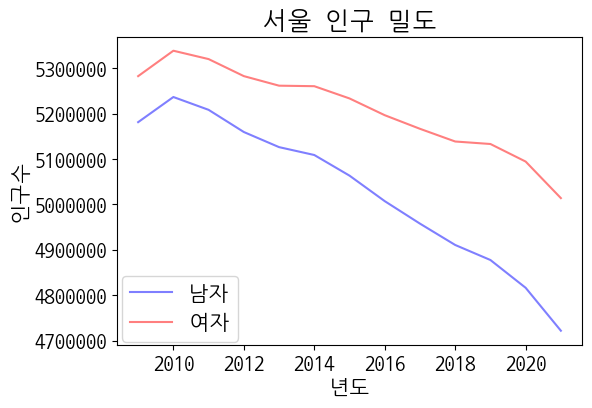

In [7]:
plt.figure(figsize=(6, 4))
x = popul.년도

plt.title('서울 인구 밀도')
plt.xlabel('년도')
plt.ylabel('인구수')

plt.plot(x, popul_m, color = 'blue', alpha = 0.5, label='남자')
plt.plot(x, popul_w, color = 'red', alpha = 0.5, label='여자')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.legend(loc=(0.01, 0.01))
plt.show()

서울시 우울증 진단경험률 통계 데이터는 공공데이터포털에서 얻을 수 있었습니다.   
보편적인 데이터를 구하기 위해 외국인과 미성년자는 제외 하였고 서울시 거주 성인 남녀를 기준으로 데이터를 정제하였습니다.  
pandas를 이용하여 자료를 불러와 데이터프레임을 만들고, matplotlib으로 인구밀도와 환자의 상관관계를 성별별로 시각화 하는 과정에 있습니다.  
현재 서울시 인구는 2010년부터 꾸준히 하락세에 있습니다.  
감당하기 힘든 집값과 물가를 고려했을때 수도권이나 지방으로 빠지는 인구가 많은 것으로 추측됩니다.

In [4]:
dep = pd.read_csv('C:/Users/yujin/Desktop/analysis/depress_total.csv', header=[0,1])
dep = dep.rename(columns = {'Unnamed: 2_level_0' : ' ', 'Unnamed: 3_level_0' : ' '})
dep_y = dep[('나이', '년도')]
dep_t = dep[('소계', '전체')]
dep.dropna(axis=1)

나이   소계            19~29세            30~44세           45~64세             \
      년도   전체   남자    여자     전체   남자    여자     전체   남자   여자     전체   남자    여자   
0   2009  2.3  1.1   3.5    1.4  1.1   1.8    1.6  0.8  2.3    3.1  1.2   4.9   
1   2010  2.2  1.2   3.2    1.5  1.4   1.5    1.6  0.8  2.5    2.8  1.3   4.2   
2   2011  2.4  1.2   3.5    1.5  1.1   1.9    1.7  1.0  2.5    2.9  1.3   4.4   
3   2012  2.5  1.4   3.5    1.8  1.3   2.4    1.3  0.9  1.7    2.9  1.4   4.3   
4   2013  2.7  1.5   3.8    2.3  2.0   2.7    1.8  1.0  2.8    2.9  1.5   4.2   
5   2014  8.3  6.2  10.3    7.2  5.5   8.8    7.4  5.6  9.3    8.7  6.9  10.4   
6   2015  7.9  6.0   9.7    8.0  5.1  10.9    7.1  6.0  8.2    8.3  6.4  10.0   
7   2016  7.0  5.4   8.4    7.7  6.0   9.4    6.3  5.8  6.8    6.5  4.7   8.2   
8   2017  7.2  5.6   8.7    7.9  5.5  10.2    6.6  5.1  8.1    6.9  5.7   8.1   
9   2018  5.1  3.6   6.4    4.7  2.9   6.5    4.4  3.3  5.5    5.1  3.9   6.2   
10  2019  6.5  5.0   8.0    7.4  5.4   9.3    6.0  4.9  7.1    6.2  5.1   7.3   
11  2020  6.3  4.8   7.7    7.3  5.5   9.0    6.3  4.8  7.8    5.9  4.6   7.0   
12  2021  7.0  5.2   8.6    7.1  4.8   9.3    6.2  4.7  7.8    7.1  5.6   8.5   

   65세 이상             
       전체   남자    여자  
0     4.1  1.8   5.9  
1     3.5  1.3   5.3  
2     4.2  1.9   6.2  
3     4.9  2.7   6.7  
4     4.5  2.3   6.4  
5    10.7  6.9  13.7  
6     8.6  6.4  10.5  
7     8.3  5.8  10.3  
8     8.1  6.4   9.5  
9     6.5  4.5   8.1  
10    7.0  4.4   9.2  
11    6.1  4.3   7.7  
12    7.6  5.6   9.4

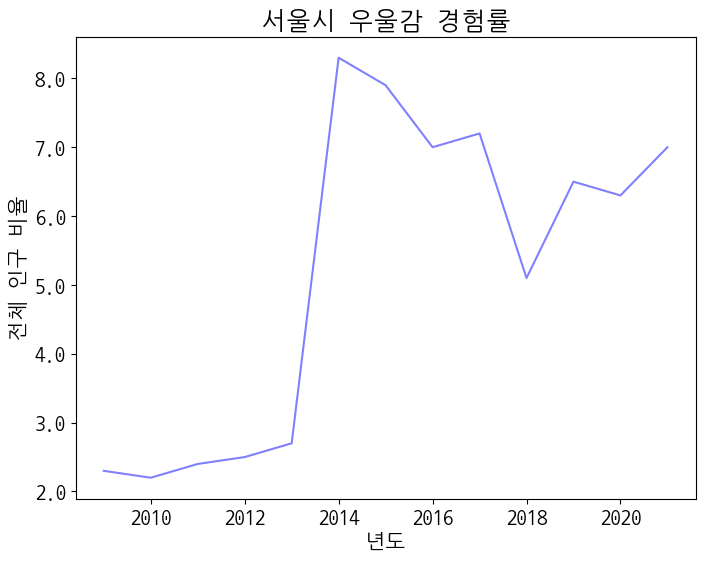

In [5]:
plt.figure(figsize=(8, 6))

plt.title('서울시 우울감 경험률')
plt.xlabel('년도')
plt.ylabel('전체 인구 비율')

plt.plot(dep_y, dep_t, color = 'blue', alpha = 0.5)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}'.format(x) for x in current_values])
plt.show()

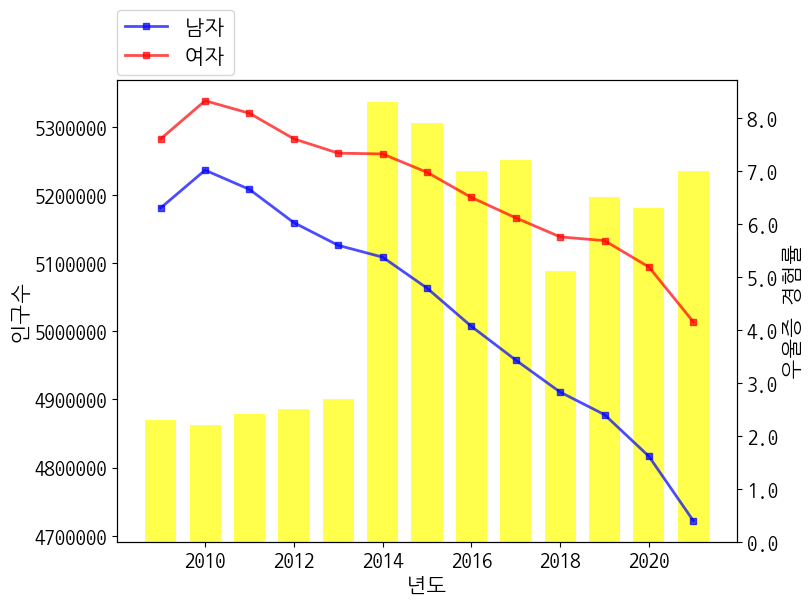

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, popul_m, '-s', color='blue', markersize=5, linewidth=2, alpha=0.7, label='남자')
ax1.plot(x, popul_w, '-s', color='red', markersize=5, linewidth=2, alpha=0.7, label='여자')
ax1.set_xlabel('년도')
ax1.set_ylabel('인구수')
plt.legend(loc=(0.0, 1.01))

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

ax2 = ax1.twinx()
ax2.bar(x, dep_t, color='yellow', label='우울증 경험률', alpha=0.7, width=0.7)
ax2.set_ylabel('우울증 경험률')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}'.format(x) for x in current_values])
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.show()

서울시의 인구 밀도(좌측 y축)는 떨어지는 추세이지만, 우울증을 경험한 환자의 수(우측 y축)는 증가하는 추세입니다.  
2014년도부터 우울증 경험률 환자가 급증한 이유는 조사 기관이 '서울특별시 시민건강국 보건의료정책과'에서 '서울시 건강격차모니터링 조사'로 바뀌었기 때문으로 추정됩니다.  
처음에 '서울 인구 밀도의 증감에 따라서 우울증 환자 비율도 같을 것이다'라는 가설을 세우고 프로젝트를 진행 하였으나,  
감소하는 경향과 다르게 우울증을 경험한 환자의 비율은 늘어나는 추세를 보였습니다.  
이는 우울증에 대한 인식이 이전보다는 조금 개선되어 적극적으로 치료에 임하는 사람들이 많아짐을 알 수 있었습니다.  
개인적인 의견으로는 연예인들처럼 영향력 있는 공인들이 매체에 나와서 우울증이나 공황장애를 겪었던 이야기를 하기 시작함으로써  
같은 증세를 겪는 일반인들도 혼자만의 질병이 아니라는 것을 깨닫게 된 것이 아닐까 조심스레 추측 해 볼 수 있었습니다.  